In [1]:
from jove.DotBashers import *
from jove.Def_DFA import *
from jove.Def_NFA import *
from jove.Def_RE2NFA import *
from jove.Def_NFA2RE import *
from jove.Def_md2mc import *

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_classes)
help(listminus)
help(bash_1)
help(mk_rep_eqc)
help(F_of)
help(rep_of_s)
help(q0_of)
help(Delta_of)
help(mk_state_eqc_name)

You may use any of these help commands:
help(mk_nfa)
help(totalize_nfa)
help(step_nfa)
help(run_nfa)
help(ec_step_nfa)
help(Eclosure)
help(Echelp)
help(accepts_nfa)
help(nfa2dfa)
help(n2d)
help(inSets)
help(rev_dfa)
help(min_dfa_brz)

You may use any of these help commands:
help(re2nfa)

You may use any of these help commands:
help(RE2Str)
help(mk_gnfa)
help(mk_gnfa_from_D)
help(dfa2nfa)
help(del_gn

 # BDDs: Minimal DFA for Boolean function on-sets 

## Boolean functions, and viewing their on-sets as formal languages

A Boolean function f(x0,x1) admits a truth-table of four entries with the
truth-table output (called "personality") defining the function for the
standard order of enumeration of x0 and x1. For AND, taking the inputs 
x1,x0 through 00, 01, 10 and 11, the outputs of AND are 0001 (the string
0001 is its personality). The personality has $2^2$ bits (for a $2$-input
Boolean function). There are $2^{2^2} = 16$ personalities for a $2$-input
Boolean function. Each personality defines a Boolean function; thus, there
are $16$ possible Boolean functions.

In general, an $N$-input truth-table has $2^N$ 
truth-table rows and a personality of length $2^N$, thus admitting $2^{2^N}$
Boolean functions of $N$ inputs.

It is impractical (and insane) to be building truth-tables for $64$-input Boolean
functions, as it will have $2^{64}$ rows. At 80 rows per sheet of paper and 5 
grams per sheet, we will need 46-billion tons of paper to print, and even a 
newborn human baby would be dead at age 100 by the time this many pages are printed.

Yet, there is a method by which _many_ 64-input Boolean functions can be exactly
represented using representations different from truth-tables. One such representation
is called a Binary Decision Diagram.

Binary Decision Diagrams (BDD) are graph structures that summarize a Boolean function's
on-sets (sets of inputs for which the function is true). The on-set of the AND function
is {11} while that for the OR function is {01, 10, 11}.

One can read on-sets as a formal language. The language of an OR-gate is thus {01, 10, 11}
(its on-set) and the language of an AND-gate is {11}.

## Building minimal DFA for the language of on-sets

Suppose there is a 6-input Boolean function modeling a magnitude comparator that 
compares the binary value coming in through input ports x2,x1,x0 against the binary
value coming through ports y2,y1,y0.

The function is "<=" where "A <= B" means the usual "less than equal to" comparison.

More specifically, we write "x2,x1,x0 <= y2,y1,y0" and we interpret the word x2,x1,x0
using the standard positional binary notation (likewise also for y2,y1,y0).

Here are some examples:

* 000 <= 000  because 0 is <= 0  (and 0 is encoded in binary as 000)

* 010 <= 110  because 2 is <= 6  (and 2 is encoded as 010 while 6 is encoded as 110)

* 110 <= 110 as well as 111  because 6 <= 6  and also 6 <= 7

"""

Here is a circuit schematic of such a comparator:

      --------
      |      |
x2 -->|      |
x1 -->|      |
x0 -->|      |
      |  <=  |--> Output
y2 -->|      |
y1 -->|      |
y0 -->|      |
      |      |
      --------


"""

$ L = \{ 0000, 0001, 0010, 0011, 0100, 0101, 0110, 1000\} $

That is, for x3,x2,x1,x0 = 0000, 0001, 0010, 0011, 0100, 0101, 0110, 1000, the function outputs a 1
and for any other input, it outputs a 0.

Suppose a user P wants to build a minimal automaton for $L$.

But suppose another astute person Q jumps in and tells P: ``do not build a minimal automaton for $L$; instead,
build one for the reverse of $L$, because that will be much more compact.'' What should P do?
 
Suppose Q were to be true. Then P obtains the benefit of a much smaller minimal automaton. He only has
   to interpret the inputs differently. That is, he would consider the language $L_r$ to be of interest,
     where 
     
     $L_r = \{ 0000, 1000, 0100, 1100, 0010, 1010, 0110, 0001\} $ and models the truth-values of inputs
       x0,x1,x2,x3

Well, let us now see if Q is actually saying the truth. Let us build minimal automata for two regular
expressions

* R =  (0000 + 0001 + 0010 + 0011 + 0100 + 0101 + 0110 + 1000)

* Rrev =  (0000 + 1000 + 0100 + 1100 + 0010 + 1010 + 0110 + 0001)

and see which minimal DFA proves to be smaller, and if one is significantly smaller, then understand why
(and then exploit that insight to keep the on-sets of functions compactly represented using minimal DFA).

In [21]:
R    =  "(0000 + 0010 + 0100 + 0110 + 1000 + 1010 + 1100 + 0001)" 

Rrev =  "(0000 + 0100 + 0010 + 0110 + 0001 + 0101 + 0011 + 1000)" 

D = min_dfa(nfa2dfa(re2nfa(R)))

Drev = min_dfa(nfa2dfa(re2nfa(Rrev)))

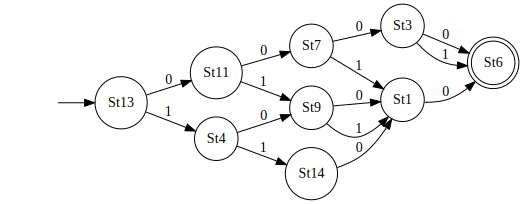

In [22]:
dotObj_dfa(D)

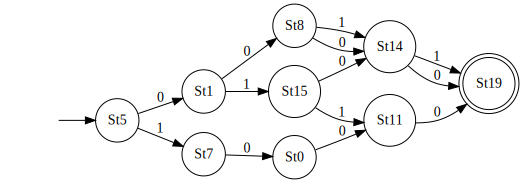

In [23]:
dotObj_dfa(Drev)

In [ ]:
D1or2 = min_dfa(union_dfa(D1,D2))
D1or2p = pruneUnreach(D1or2)
dotObj_dfa(D1or2)

In [ ]:
dotObj_dfa(D1or2p)

In [ ]:
D1and2 = min_dfa(intersect_dfa(D1,D2))
D1and2p = pruneUnreach(D1and2)
dotObj_dfa(D1and2)

In [ ]:
dotObj_dfa(D1and2p)

In [ ]:
d1=nfa2dfa(re2nfa("abcde"))
d2=nfa2dfa(re2nfa("abced"))
langeq_dfa(d1,d2,True)

In [ ]:
dotObj_dfa(d1)

In [ ]:
dotObj_dfa(d2)

In [ ]:
d1a=nfa2dfa(re2nfa("aa*+bc"))
d2a=nfa2dfa(re2nfa("a(a*+bc)"))
langeq_dfa(d1a,d2a,True)

In [ ]:
dotObj_dfa(d1a)

In [ ]:
dotObj_dfa(d2a)

In [ ]:
d1b=nfa2dfa(re2nfa("aaa*+aa*bc+bcaa*+bcbc"))
d2b=nfa2dfa(re2nfa("(aa*+bc)(aa*+bc)"))
langeq_dfa(d1b,d2b,True)

In [ ]:
dotObj_dfa(d1b)

In [ ]:
dotObj_dfa(d2b)

In [ ]:
iso_dfa(d1b,d2b)

In [ ]:
d1c=min_dfa(d1b)

In [ ]:
d2c=min_dfa(d2b)

In [ ]:
iso_dfa(d1c,d2c)

In [ ]:
dotObj_dfa(d1c)

In [ ]:
dotObj_dfa(d2c)

In [ ]:
d1d=nfa2dfa(re2nfa("aaa*+aa*bc+bcaaa*+bcbc"))
d2d=nfa2dfa(re2nfa("(aa*+bc)(aa*+bc)"))
langeq_dfa(d1d,d2d,True)

In [ ]:
d1d=nfa2dfa(re2nfa("a a a*+a a* b c+ b c a a a*+b c b c"))
d2d=nfa2dfa(re2nfa("(a a*+b c)(a a*+b c)"))
langeq_dfa(d1d,d2d,True)

In [ ]:
dotObj_dfa(d1d)

In [ ]:
dotObj_dfa(d2d)

In [ ]:
d1d=nfa2dfa(re2nfa("james*+bond*"))
dotObj_dfa(d1d)

In [ ]:
d1d=nfa2dfa(re2nfa("ja mes*+bo nd*"))
dotObj_dfa(d1d)

In [ ]:
d1d=nfa2dfa(re2nfa("''"))
dotObj_dfa(d1d)

In [ ]:
help(md2mc)

In [ ]:
test = md2mc(src="File", fname="machines/nfafiles/endsin0101.nfa")
dotObj_nfa(test)

In [ ]:
# NFA for 0101 within hamming dist of 2
nfamd1 = md2mc(src="File", fname="machines/nfafiles/nfa0101h2.nfa")
dotObj_nfa(nfamd1)

In [ ]:
dfamd1=nfa2dfa(nfamd1)
dotObj_dfa(dfamd1)

In [ ]:
m1=min_dfa(dfamd1)

In [ ]:
m2=min_dfa_brz(dfamd1)

In [ ]:
dotObj_dfa(m1)

In [ ]:
dotObj_dfa(m2)

In [ ]:
iso_dfa(m1,m2)

In [ ]:
help(del_gnfa_states)

In [ ]:
gnfamd1=mk_gnfa(nfamd1)
dotObj_gnfa(gnfamd1)

In [ ]:
(Gfinal, dotObj_List, final_re_str) = del_gnfa_states(gnfamd1)

In [ ]:
final_re_str

In [ ]:
dotObj_List[0]

In [ ]:
dotObj_List[1]

In [ ]:
dotObj_List[2]

In [ ]:
dotObj_List[3]

In [ ]:
dotObj_List[4]

In [ ]:
len(dotObj_List)

In [ ]:
dotObj_List[11]

In [ ]:
final_re_str

In [ ]:
fullcircle=min_dfa(nfa2dfa(re2nfa(final_re_str)))

In [ ]:
dotObj_dfa(fullcircle)

In [ ]:
h2_from_re = min_dfa(nfa2dfa(re2nfa("(0+1)(0+1)01 + (0+1)1(0+1)1 + (0+1)10(0+1) + 0(0+1)(0+1)1 + 0(0+1)0(0+1) + 01(0+1)(0+1)")))

In [ ]:
dotObj_dfa(h2_from_re)

In [ ]:
iso_dfa(fullcircle,h2_from_re)

In [ ]:
epsre = dotObj_nfa(re2nfa("''"), True)
epsre.source

In [ ]:
epsre

In [ ]:
are = dotObj_nfa(re2nfa("a"), True)
are.source

In [ ]:
are

In [ ]:
aplusbre = dotObj_nfa(re2nfa("a+b"), True)
aplusbre.source

In [ ]:
aplusbre

In [ ]:
abre = dotObj_nfa(re2nfa("ab"), True)
abre.source

In [ ]:
abre

In [ ]:
arestar = dotObj_nfa(re2nfa("a*"), True)
arestar.source

In [ ]:
arestar

In [ ]:
aplusbstar = dotObj_nfa(re2nfa("(a+b)*"), True)
aplusbstar.source

In [ ]:
aplusbstar

In [ ]:
aplusb_aplusbstar = dotObj_nfa(re2nfa("(a+b)(a+b)*"), True)
aplusb_aplusbstar.source

In [ ]:
aplusb_aplusbstar

In [ ]:
aplusb_aplusb = dotObj_nfa(re2nfa("(a+b)(a+b)"), True)

In [ ]:
aplusb_aplusb

In [ ]:
aplusb_aplusb.source

In [ ]:
DOodd1s_or_30s = dotObj_nfa(re2nfa("0* 1 0* (1 0* 1 0*)* + 1* 0 1* 0 1* 0 1* "), True)

In [ ]:
DOodd1s_or_30s

In [ ]:
DOodd1s_or_30s = dotObj_nfa(re2nfa("0* 1 0* (1 0* 1 0*)* + 1* 0 1* 0 1* 0 1* "), False)

In [ ]:
DOodd1s_or_30s

In [ ]:
DOodd1s_or_30s.source

In [ ]:
DOodd1s_or_30s_mind = dotObj_dfa(min_dfa(nfa2dfa(re2nfa("0* 1 0* (1 0* 1 0*)* + 1* 0 1* 0 1* 0 1* "))))
DOodd1s_or_30s_mind

In [ ]:
DOodd1s_or_30s_mind.source

# Designing DFA that accept within a Hamming Distance

Given a regular language, say (0+1)* 0101 (0+1)* (i.e., all bit-strings with an occurrence of 0101 in it), let us come up with 

1. An RE that represents strings within a Hamming distance of 2 from strings in this language

2. An NFA that represents strings within a Hamming distance of 2 from strings in this language


In [ ]:
h2_0101_re = ("(0+1)* ( (0+1)(0+1)01 +" + 
                      " (0+1)1(0+1)1 +" + 
                      " (0+1)10(0+1) +" + 
                      " 0(0+1)(0+1)1 +" +
                      " 0(0+1)0(0+1) +" +
                      " 01(0+1)(0+1) )" +
              "(0+1)*")

In [ ]:
h2_0101_re

In [ ]:
minD_h2_0101_re = min_dfa(nfa2dfa(re2nfa(h2_0101_re)))

In [ ]:
DO_minD_h2_0101_re = dotObj_dfa(minD_h2_0101_re)

In [ ]:
DO_minD_h2_0101_re

In [ ]:
DO_minD_h2_0101_re.source

In [ ]:
h2_0101_nfa_md = '''
NFA
!!--------------------------------------------
!! We are supposed to process (0+1)*0101(0+1)*
!! with up to two "dings" allowed
!!
!! Approach: Silently error-correct, but remember
!! each "ding" in a new state name.
!! After two dings, do not error-correct anymore
!!--------------------------------------------

!!-- pattern for (0+1)* is the usual
!!-- no error-correction needed here :-)
I : 0 | 1 -> I

!!-- Now comes the opportunity to exit I via 0101
!!-- The state names are A,B,C,D with ding-count
!!-- Thus A0 is A with 0 dings
!!-- C2 is C with 2 dings; etc

!!-- Ding-less traversal -- how lucky!
I  : 0 -> A0
A0 : 1 -> B0
B0 : 0 -> C0
C0 : 1 -> F
!!-- Phew, finally at F
F  : 0 | 1 -> F

!!-- First ding in any of these cases
I  : 1 -> A1
A0 : 0 -> B1
B0 : 1 -> C1
C0 : 0 -> F  !!-- ding-recording un-nec.; just goto F

!!-- Second ding in any of these cases
A1 : 0 -> B2
B1 : 1 -> C2
C1 : 0 -> F  !!-- ding-recording un-nec.; just goto F

!!-- No more dings allowed!
B2 : 0 -> C2
C2 : 1 -> F

!!-- Allow one-dingers to finish fine
A1 : 1 -> B1
B1 : 0 -> C1
C1 : 1 -> F

'''

In [ ]:
h2_0101_nfa = md2mc(h2_0101_nfa_md)

In [ ]:
DO_h2_0101_nfa = dotObj_nfa(h2_0101_nfa)
DO_h2_0101_nfa

In [ ]:
DO_h2_0101_nfa.source

In [ ]:
minD_h2_0101_nfa = min_dfa(nfa2dfa(h2_0101_nfa))
DO_minD_h2_0101_nfa = dotObj_dfa(minD_h2_0101_nfa)
DO_minD_h2_0101_nfa

In [ ]:
DO_minD_h2_0101_nfa.source

In [ ]:
iso_dfa(minD_h2_0101_re, minD_h2_0101_nfa)

In [ ]:
nfaEx = md2mc('''NFA
I : '' -> B
I : a  -> A
!!A : b  -> I
A : q  -> F
A : r  -> B
B : s  -> B
B : p  -> F
F : t  -> A
''')
DO_nfaEx = dotObj_nfa(nfaEx)
DO_nfaEx

In [ ]:
DO_nfaEx.source

In [ ]:
GNFA_nfaEx = mk_gnfa(nfaEx)

In [ ]:
dotObj_gnfa(GNFA_nfaEx).source

In [ ]:
help(del_gnfa_states)

In [ ]:
(Gfinal, do_list, final_re) = del_gnfa_states(GNFA_nfaEx)

In [ ]:
final_re

In [ ]:
final_re

In [ ]:
do_list[0]

In [ ]:
do_list[0].source

In [ ]:
do_list[1]

In [ ]:
do_list[1].source

In [ ]:
do_list[1]

In [ ]:
do_list[2]

In [ ]:
do_list[2].source

In [ ]:
do_list[3]

In [ ]:
do_list[3].source

In [ ]:
do_list[4]

In [ ]:
do_list[4].source

In [ ]:
re_mindfa = min_dfa(nfa2dfa(re2nfa(final_re)))

In [ ]:
dir_mindfa = min_dfa(nfa2dfa(nfaEx))

In [ ]:
iso_dfa(re_mindfa,dir_mindfa)

In [ ]:
dotObj_dfa(dir_mindfa)

In [ ]:
dotObj_dfa(dir_mindfa).source

In [ ]:
dotObj_dfa(re_mindfa)

In [ ]:
dotObj_dfa(re_mindfa).source

In [ ]:
dot_san_str('""')

In [ ]:
nfaExp = md2mc('''NFA
I : a -> A1
I : n -> B1
A1 : b -> AB1
B1 : o -> AB1
AB1 : c -> A2
AB1 : p -> B2
A2 : d -> AB2
B2 : q -> AB2
AB2 : e -> A3
AB2 : r -> B3
A3 : f -> AB3
B3 : s -> AB3
AB3 : g -> A4
AB3 : t -> B4
A4 : h -> FAB4
B4 : u -> FAB4
''')
DO_nfaExp = dotObj_nfa(nfaExp)
DO_nfaExp

In [ ]:
gnfaExp = mk_gnfa(nfaExp)
DO_gnfaExp = dotObj_gnfa(gnfaExp)
DO_gnfaExp

In [ ]:
(Gfinal, dotObj_List, final_re_str) = del_gnfa_states(gnfaExp)

In [ ]:
final_re_str

In [ ]:
nfaExer = md2mc('''NFA
I1 : a -> X
I2 : b -> X
I3 : c -> X
X  : p | q -> X
X  : m -> F1
X  : n -> F2
''')
DO_nfaExer = dotObj_nfa(nfaExer)
DO_nfaExer
gnfaExer = mk_gnfa(nfaExer)
DO_gnfaExer = dotObj_gnfa(gnfaExer)
DO_gnfaExer
(G, DO, RE) = del_gnfa_states(gnfaExer)

In [ ]:
RE

In [ ]:
DO_nfaExer

In [ ]:
DO_nfaExer.source

In [ ]:
DO[0]

In [ ]:
DO[1]

In [ ]:
DO[2]

In [ ]:
DO[3]

In [ ]:
DO[4]

In [ ]:
DO[5]

In [ ]:
DO[6]

In [ ]:
nfaExer = md2mc('''NFA
I1 : a -> X
I2 : b -> X
I3 : c -> X
X  : p | q -> X
X  : m -> F1
X  : n -> F2
''')
DO_nfaExer = dotObj_nfa(nfaExer)
DO_nfaExer
gnfaExer = mk_gnfa(nfaExer)
DO_gnfaExer = dotObj_gnfa(gnfaExer)
DO_gnfaExer
(G, DO, RE) = del_gnfa_states(gnfaExer, DelList=["X", "I1", "I2","I3","F1","F2"])

In [ ]:
DO_gnfaExer

In [ ]:
len(DO)

In [ ]:
DO_gnfaExer.source

In [ ]:
RE

In [ ]:
DO[0]

In [ ]:
DO[1]

In [ ]:
DO[1].source

In [ ]:
DO[2]

In [ ]:
DO[3]

In [ ]:
DO[4]

In [ ]:
DO[5]

In [ ]:
DO[6]

In [ ]:
RE

In [ ]:
sylv_11_13 = min_dfa(nfa2dfa(re2nfa("(11111111111+1111111111111)*")))

In [ ]:
dotObj_dfa(sylv_11_13)

In [ ]:
sylv_11_13

In [ ]:
sylv_3_5 = min_dfa(nfa2dfa(re2nfa("(111+11111)*")))

In [ ]:
len(sylv_3_5["Q"]) - 2

In [ ]:
3*5-3-5

In [ ]:
dotObj_dfa(sylv_3_5)

In [ ]:
dotObj_nfa(re2nfa("(111+11111)*"))

In [ ]:
nfa_3_5 = re2nfa("(111+11111)*")

In [ ]:
nfa_3_5

In [ ]:
dotObj_nfa(nfa_3_5)

In [ ]:
Gnfa_3_5 = mk_gnfa(nfa_3_5)

In [ ]:
Gnfa_3_5

In [ ]:
dotObj_gnfa(Gnfa_3_5)

In [ ]:
(Gfinal, dotObj_List, final_re_str) = del_gnfa_states(Gnfa_3_5)

In [ ]:
len(dotObj_List)

In [ ]:
dotObj_List[0]

In [ ]:
dotObj_List[1]

In [ ]:
dotObj_List[2]

In [ ]:
dotObj_List[3]

In [ ]:
dotObj_List[4]

In [ ]:
dotObj_List[5]

In [ ]:
dotObj_List[6]

In [ ]:
dotObj_List[7]

In [ ]:
dotObj_List[8]

In [ ]:
dotObj_List[9]

In [ ]:
dotObj_List[10]

In [ ]:
dotObj_List[11]

In [ ]:
dotObj_List[12]

In [ ]:
dotObj_List[13]

In [ ]:
dotObj_List[14]

In [ ]:
dotObj_List[15]

In [ ]:
dotObj_List[16]

In [ ]:
dotObj_List[17]

In [ ]:
len(dotObj_List)

In [ ]:
final_re_str

In [ ]:
dotObj_gnfa(mk_gnfa(re2nfa("(111+11111)*")))

In [ ]:
minD_renfare = min_dfa(nfa2dfa(re2nfa(final_re_str)))

In [ ]:
DOminD_renfare = dotObj_dfa(minD_renfare)

In [ ]:
DOminD_renfare

In [ ]:
dotObj_dfa(min_dfa(nfa2dfa(nfa_3_5)))

In [ ]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa("(111+11111)*"))))

In [ ]:
sylv_3_5 = min_dfa(nfa2dfa(re2nfa("(111+11111)*")))

In [ ]:
len(sylv_3_5["Q"]) - 1 - 1

In [ ]:
DO_sylv_3_5 = dotObj_dfa(sylv_3_5)

In [ ]:
DO_sylv_3_5.source

In [ ]:
non_sylv_3_6 = min_dfa(nfa2dfa(re2nfa("(111+111111)*")))

In [ ]:
DO_non_sylv_3_6 = dotObj_dfa(non_sylv_3_6)

In [ ]:
DO_non_sylv_3_6

In [ ]:
DO_non_sylv_3_6.source

In [ ]:
non_sylv_prefix_and_3_6 = min_dfa(nfa2dfa(re2nfa("111(111+111111)*")))

In [ ]:
DO_non = dotObj_dfa(non_sylv_prefix_and_3_6)

In [ ]:
DO_non

In [ ]:
DO_non.source

In [ ]:
stamp_3_5_7 = min_dfa(nfa2dfa(re2nfa("(111+11111+1111111)*")))

In [ ]:
DOstamp_3_5_7 = dotObj_dfa(stamp_3_5_7)

In [ ]:
DOstamp_3_5_7

In [ ]:
DOstamp_3_5_7.source

In [ ]:
len(min_dfa(nfa2dfa(re2nfa("(111+1111111111111)*")))["Q"]) - 2

In [ ]:
dfaBESame = md2mc('''
DFA !! Begins and ends with same; epsilon allowed
IF  : 0 -> F0
IF  : 1 -> F1
!!
F0  : 0 -> F0
F0  : 1 -> S01
S01 : 1 -> S01
S01 : 0 -> F0
!!
F1  : 1 -> F1
F1  : 0 -> S10
S10 : 0 -> S10
S10 : 1 -> F1
''')
DOdfaBESame = dotObj_dfa(dfaBESame)
DOdfaBESame

In [ ]:
nfaBESame = apply_h_dfa(dfaBESame, lambda x: '0')

In [ ]:
nfaBESame

In [ ]:
DONFABESame = dotObj_nfa(nfaBESame)

In [ ]:
DONFABESame

In [ ]:
dotObj_dfa(nfa2dfa(nfaBESame))

In [ ]:
dotObj_dfa(min_dfa(nfa2dfa(nfaBESame)))

In [ ]:
blimp = md2mc('''
DFA 
I1 : a -> F2
I1 : b -> F3
F2 : a -> S8
F2 : b -> S5
F3 : a -> S7
F3 : b -> S4
S4 : a | b -> F6
S5 : a | b -> F6
F6 : a | b -> F6
S7 : a | b -> F6
S8 : a -> F6
S8 : b -> F9
F9 : a -> F9
F9 : b -> F6
''')

In [ ]:
blimpnfa = apply_h_dfa(blimp, lambda x: 'a')

In [ ]:
dotObj_nfa(blimpnfa)

In [ ]:
dotObj_nfa(blimpnfa).source

In [ ]:
dotObj_dfa(nfa2dfa(blimpnfa))

In [ ]:
dotObj_dfa(min_dfa(nfa2dfa(blimpnfa)))

In [ ]:
dotObj_dfa(min_dfa(nfa2dfa(blimpnfa))).source

In [ ]:
testdfa = md2mc('''DFA
I : 0 | 1 -> I
I : 2 -> F
''')

In [ ]:
dotObj_dfa_w_bh(testdfa)

In [ ]:
help(dotObj_dfa_w_bh)

In [ ]:
dotObj_dfa(testdfa, FuseEdges=True)

In [ ]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa("(111+11111)*"))))

In [ ]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa("(111+1111111111111)*"))))

In [ ]:
ResetStNum()

In [ ]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa("(111+1111111111111)*"))))

In [ ]:
ResetStNum()

In [ ]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa("(111+1111111111111)*"))))